# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('./prestacar.csv')
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [3]:
X = datos.drop(columns='moroso', axis=1)
y = datos.moroso  

In [4]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

> La exactitud del modelo es de 1, lo que indica que el modelo clasifica perfectamente todos los clientes de entrenamiento. Esto podria sugerir un sobreajuste.

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# entrenamiento
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)

# validacion
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [7]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 1.0
La exactitud del modelo con el conjunto de validacion es: 0.8460935458583747


> Los resultados de entrenamiento y validacion indican que el modelo memorizo los datos de entrenamiento.

Vamos a crear un nuevo modelo de arbol pero esta vez, ajustando la profundidad 

In [8]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.9205865272938444
La exactitud del modelo con el conjunto de validacion es: 0.9060186394913335


> Los resultados indican que el modelo generaliza mejor ya que no esta memorizando todas las salidas

> La exactitud significa que el modelo en el 90% generalizo bien. Es una metrica que nos no dice mucho ya que no esecifica que esta generalizando y si lo esta haciendo bien.

### Evaluando el modelo

In [9]:
# matriz de confusion
from sklearn.metrics import confusion_matrix

In [10]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10360   119]
 [  960    42]]


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

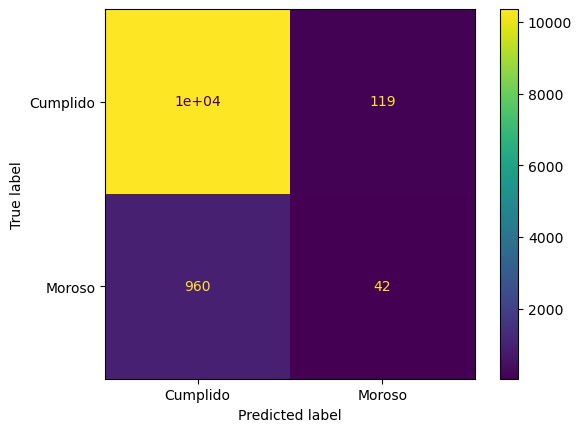

In [12]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

> El modelo clasifica correctamente masa de 10 mil clientes como cumplido.

> El modelo claisifica 960 como cumplidos pero en realidad son morosos.

> El modelo clasifica a 119 como morosos pero en realidad son cumplidos.

> El modelo identifica solo a 42 correctamente como morosos.

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

> TN: Verdadero Negativo

> FP: Falso Positivo. Tambien se conoce como error Tipo I

> FN: Falso Negativo. Tambien se conoce como error Tipo II

> TP: Verdadero Positivo

La exactitud viene representada por el accuracy que como vemos es una proporcion. En lo que sigue vamos a obtener el valor de cada metrica 

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
# precision manual
# es la proporcion de verdadero positivo
42/(42 + 119)

0.2608695652173913

In [15]:
# precision con python
print(f'La precision del modelo es: {precision_score(y_val, y_previsto)}')

La precision del modelo es: 0.2608695652173913


In [16]:
# otras metricas
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}')
print(f'La exactitud (Accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}')
print(f'El f1-score del modelo es: {f1_score(y_val, y_previsto)}')

La sensibilidad (Recall) del modelo es: 0.041916167664670656
La exactitud (Accuracy) del modelo es: 0.9060186394913335
El f1-score del modelo es: 0.07222699914015478


> El modelo tiene 4% de sensibilidad. Esta metrica indica que la empresa esta financiando a mucha gente morosa. Esta metrica es la que vamos a priorizar e intentaremos a reducir lo mas posible.

> El f1-score penaliza el modelo. Mientras mas lejos de 1 este valor, peor se desempena el modelo.

### Curva ROC

In [17]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




> El objetivo con nuestro modelo es reducir el error Tipo II y aumentar el TP. Mejorar estas metricas se compensa con las otras dos metricas restantes.



In [18]:
from sklearn.metrics import RocCurveDisplay

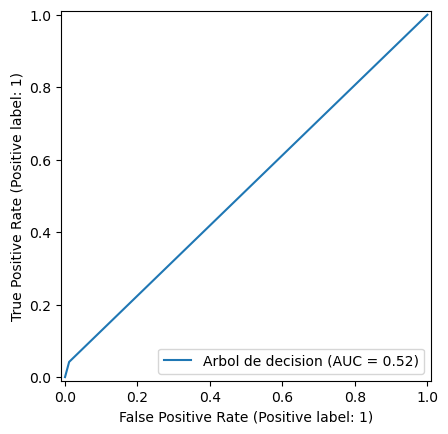

In [19]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arbol de decision');

> El trazo recto indica aleatoriedad. Esto implica que el modelo no esta generalizando ni clasificando la gente correctamente.

> A pesar que el modelo tenga una exactitud del 95%, queda claro que es deficiente.

> El valor de AUC indica la capacidad del modelo de clasificar correctamente las clases. En este caso lo hace aleatoriamente (50% acierta y 50% no acierta)

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
print(f'El area bajo la curva ROC es: {roc_auc_score(y_val, y_previsto)}')

El area bajo la curva ROC es: 0.5152800611202445


### Curva de  precisión x sensibilidad

In [22]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


> Esta curva al acercarse a una recta se dice que las predicciones son aleatorias, el modelo no logra distinguir entre las clases.

> Cuando la curva tiene a un semi cuadro de valor 1, se dice que el modelo logra distinguir entre las clases correctamente.

> Como la curva de precisión x recall no evalúa la tasa de verdaderos negativos, que generalmente contendrá la mayor cantidad de datos, el análisis se concentra más en la clase con menor cantidad de datos, y esto hace que el análisis sea mejor en datos desbalanceados.

In [23]:
# importamos precision sensibilidad
from sklearn.metrics import PrecisionRecallDisplay

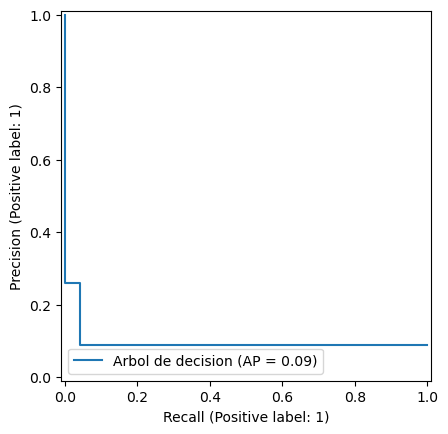

In [24]:
# obtenemos la grafica
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Arbol de decision');

> el modelo es mas preciso (26%) que sensible (4%). 

> El promedio de ambas metricas para el modelo es de 0.09. Loideal es 1. Esto indica que el modelo es deficiente

In [25]:
from sklearn.metrics import average_precision_score

In [26]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de precision vs recall es: 0.09455106215466953


### Informe de métricas

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



> Los cliente cumplidos (0) son mayor que los clientes morosos (1). Esta diferencia se evidencia en la presicion. No hay un equilibrio entre las clases lo que podria sesgar los resultados

>  El recall de los clientes morosos es muy baja lo que indica que el modelo no identifica bien los morosos.

> El accuracy es bastante alto (de 91%) sin embargo esto no implica que el modelo clasifique bien.

> EL promedio general para la precision es de 59% , para el recall es de 52%, para el f1 es de 0.51.

> Los promedios ponderado son mas altos debido a que son favorecidos por la clases mas dominante. 

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [29]:
from sklearn.model_selection import KFold, cross_validate

In [30]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.34796071, 0.33494496, 0.31941962, 0.42532492, 0.3581059 ]),
 'score_time': array([0.00889635, 0.00457191, 0.0042603 , 0.0061965 , 0.00370359]),
 'test_score': array([0.91311922, 0.90755662, 0.90755662, 0.91387195, 0.90004355])}

In [31]:
cv_resultados['test_score']

array([0.91311922, 0.90755662, 0.90755662, 0.91387195, 0.90004355])

Para saber si el modelo esta generalizando bien y el intervalo de confianza, calculamos el promedio de los test_score y la desviacion estandar de los mismos

In [32]:
promedio = cv_resultados['test_score'].mean()
std = cv_resultados['test_score'].std()

print(f'El promedio de la exactitud es de {promedio}')
print(f'El desvio tipico es de {std}')
print(f'El intervalo de confianza es: [{promedio-2*std}, {min(promedio+2*std, 1)}]')

El promedio de la exactitud es de 0.9084295923515654
El desvio tipico es de 0.004969137569311203
El intervalo de confianza es: [0.898491317212943, 0.9183678674901878]


> El modelo, independiente de como sea, tendra un desempeno peor de 0.89 y en el mejor de los casos sera de 0.91

### Validación cruzada con sensibilidad

Para este caso, nos interesa mejorar la sensibilidad o recall del modelo ya que nos permite disminuir el error de tipo II.

In [33]:
def intervalo_confianza(resultados):
    promedio = resultados['test_score'].mean()
    std = resultados['test_score'].std()
    return print(f'El intervalo de confianza es: [{promedio-2*std}, {min(promedio+2*std, 1)}]')

In [34]:
# definimos el modelo esta vez generando el resultado con la metrica recall
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.28591728, 0.26999712, 0.40689826, 0.34032845, 0.26519132]),
 'score_time': array([0.00600266, 0.00590014, 0.01593804, 0.00713921, 0.00824022]),
 'test_score': array([0.02642008, 0.01732673, 0.0196802 , 0.01697128, 0.02312139])}

In [35]:
# calculo de intervalo de confianza de recall
intervalo_confianza(cv_resultados)

El intervalo de confianza es: [0.01349812441055035, 0.02790974574628096]


### Estratificando los datos

In [36]:
datos['moroso'].value_counts()

moroso
0    49309
1     4716
Name: count, dtype: int64

> Hay una gran diferencia entre ambas clases

> Al hacer la division en KFold, no nos aseguramos que se mantuviera la misma proporcion de las clases en cada muestra lo cual es un problema ya que el modelo no esta haciendo una validacion cruzada efectiva.

In [37]:
# metodos estratificado de validacion cruzada
from sklearn.model_selection import StratifiedKFold

In [38]:
# usamos la validacion estratificada
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

In [39]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es: [0.021008308265166562, 0.03785763548967855]


> Se nota la diferencia entre el intervalo de confianza del modelo anterior y del modelo convalidacion cruzada estratificada.

> Los rangos han cambiado pero el ancho de cada uno es similar (de 0.016 aproximadamente)

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [42]:
y_balanceada.value_counts(normalize=True)

moroso
0    0.5
1    0.5
Name: proportion, dtype: float64

In [ ]:
# usamos la validacion estratificada sobre datos balanceados
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv=skf, scoring='recall')

In [44]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es: [0.7148366272381305, 0.7522373242515067]


> El recall aumenta considerablemente al balancear las clases creando datos artificiales que siguen el patron de la clase con menos elementos

> A pesar de los buenos resultados, no podemos determinar si el modelo esta funcionando bien debido a que estamos haciendo una validacion sobre datos balanceados. Entrenamos el modelo con datos balanceados pero en la validacion los datos siguen desbalanceados

### Pipeline para validación

Para determinar si el modelo responde bien ante datos desbalanceados, creamos un pipeline que nos ofrece la libreria _imblearn_ para la validacion.

Una pipeline es una secuencia de tareas que requieren ser ejecutadas. Vamos a aplicar una secuencia en el proceso de entrenamiento y validacion del modelo

In [ ]:
# importar pipeline
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
# instanciamos el modelo
modelo = DecisionTreeClassifier(max_depth=10)
# secuencia con el oversample y el modelo
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo)])

In [ ]:
# definimos la validacion estratificada sobre los datos originales
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [48]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es: [0.20639266475861823, 0.3378808586737497]


> El intervalo de confianza del recall aumento considerablemente pasando de 2% a 22%.

> Este resultado es de gran relevancia debido a que estamos usando un modelo muy simple: un arbol de decisio con 10 de profundidad.

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

Este metodo permite disminuir la clase dominante a la misma proporcion de la clase minoritaria realizando la seleccion segun algunas caracteristicas similares entre ambas clases. 

In [49]:
# importar el undersampling de imblearn
from imblearn.under_sampling import NearMiss

In [50]:
# instanciamos el modelo
modelo = DecisionTreeClassifier(max_depth=10)
# secuencia con el undersample y el modelo
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arbol', modelo)])

# definimos la validacion estratificada sobre los datos originales
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [51]:
intervalo_confianza(cv_resultados)

El intervalo de confianza es: [0.6248974551306322, 0.7001046463572212]


> El intervalo de confianza de recall es mucho mejor que en casos anteriores lo que muestra la ventaja del undersampling en este caso

### Probando el modelo

In [52]:
undersample = NearMiss(version=3)
x_balanceada, y_balanceada = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



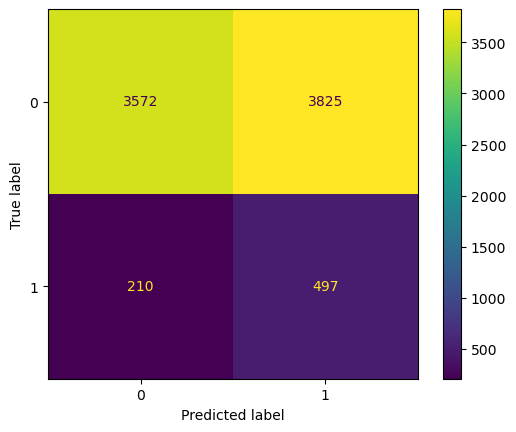

In [54]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

> El modelo logra a predecir 497 casos en los que el cliente es moroso. 

> La metrica recall alcanza un valor del 70% y una presicion del 11%

> El objetivo es detectar mejor los clientes morosos a cambio de asignar clientes buenos como clientes morosos. Es un riesgo que asume la empresa con tal de identificar los clientes morosos mucho mejor 